Assignment Problem statement:
Load the given data into jupyter notebook (Local instance/Colab or similar)

2. Perform basic data checks using Exploratory data analysis (EDA)
3. Identify 5 Key insights from the given dataset
4. Predict next 6 months sales at vehicle segment 1 or category name level.
Share the final notebook back in the teams
.ipynb format

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('C:/Users/LENOVO/Downloads/New_folder/Vehicle_Sales_Data.xlsx')

In [4]:
df.head()

,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,Domestic Sale,Export Sale,Category,Category Name,YrMth
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
2,SKOAP3EEDI,OA,Octavia,SKODAAUTO INDIA PVT LTD,Premium Car 3,Executive,DIESEL,NOV,2012,0,0,0,PVPC,Passenger car PV,01-11-2012
3,HMORF2U4PT,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,PETROL,NOV,2012,0,6,0,PVUV,Utility vehicles PV,01-11-2012
4,FMTXF1U3PT,TX,Trax,FORCE MOTORS LTD,MPV,UV3,PETROL,MAY,2012,0,0,0,PVUV,Utility vehicles PV,01-05-2012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666 entries, 0 to 19665
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vehicle Full Code  19666 non-null  object
 1   Vehicle Code       19666 non-null  object
 2   OEM Model Name     19666 non-null  object
 3   SIAM Company Code  19666 non-null  object
 4   SIAM Segment 1     19654 non-null  object
 5   SIAM Segment 2     19666 non-null  object
 6   SIAM Fuel          19648 non-null  object
 7   Month              19666 non-null  object
 8   Year               19666 non-null  int64 
 9   Production Qty     19666 non-null  int64 
 10  Domestic Sale      19666 non-null  int64 
 11  Export Sale        19666 non-null  int64 
 12  Category           18569 non-null  object
 13  Category Name      18569 non-null  object
 14  YrMth              19666 non-null  object
dtypes: int64(4), object(11)
memory usage: 2.3+ MB


#### null values

In [6]:
df.isnull().sum()

Vehicle Full Code       0
Vehicle Code            0
OEM Model Name          0
SIAM Company Code       0
SIAM Segment 1         12
SIAM Segment 2          0
SIAM Fuel              18
Month                   0
Year                    0
Production Qty          0
Domestic Sale           0
Export Sale             0
Category             1097
Category Name        1097
YrMth                   0
dtype: int64

#### column names

In [7]:
df.columns

Index(['Vehicle Full Code', 'Vehicle Code', 'OEM Model Name',
       'SIAM Company Code', 'SIAM Segment 1', 'SIAM Segment 2', 'SIAM Fuel',
       'Month', 'Year', 'Production Qty', 'Domestic Sale', 'Export Sale',
       'Category', 'Category Name', 'YrMth'],
      dtype='object')

#### basic statistics

In [8]:
df.describe()

,Year,Production Qty,Domestic Sale,Export Sale
count,19666.000000,19666.00000,19666.000000,19666.000000
mean,2015.257399,1262.62992,1126.482203,238.537628
std,2.290398,2957.78831,2667.334476,963.164029
min,2012.000000,-28.00000,-128.000000,0.000000
25%,2013.000000,0.00000,0.000000,0.000000
50%,2015.000000,35.00000,77.000000,0.000000
75%,2017.000000,950.75000,865.750000,1.000000
max,2019.000000,33128.00000,30499.000000,15088.000000


In [9]:
df2 = df[['Production Qty','Domestic Sale','Export Sale']]

<AxesSubplot:>

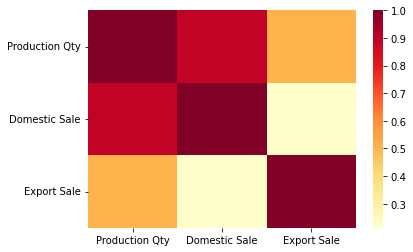

In [10]:
sns.heatmap(df2.corr(), cmap='YlOrRd', annot_kws={'size': 20})

In [11]:
df['SIAM Company Code'].value_counts()

MARUTI SUZUKI INDIA LTD                    2662
TATA MOTORS LTD                            2369
HYUNDAI MOTOR INDIA LTD                    2052
MAHINDRA & MAHINDRA LTD                    1876
TOYOTA KIRLOSKAR MOTOR PVT LTD             1457
GENERAL MOTORS INDIA PVT LTD               1368
HONDA CARS INDIA LTD                       1247
VOLKSWAGEN INDIA PVT LTD                   1041
NISSAN MOTOR INDIA PVT LTD                 1038
FORD INDIA PVT LTD                          941
SKODAAUTO INDIA PVT LTD                     879
RENAULT INDIA PVT LTD                       866
FIAT INDIA AUTOMOBILES PVT LTD              614
HINDUSTAN MOTORS LTD                        395
FORCE MOTORS LTD                            370
ISUZU MOTORS INDIA PVT LTD                  169
HINDUSTAN MOTOR FINANCE CORPORATION LTD     102
ASHOK LEYLAND LTD                            95
FCA INDIA AUTOMOBILES PVT LTD                64
MG MOTOR                                     25
BMW                                     

In [12]:
df['Category'].value_counts()

PVPC    11700
PVUV     5746
PVVN     1123
Name: Category, dtype: int64

In [13]:
df['SIAM Fuel'].value_counts()

DIESEL      9691
PETROL      8178
LPG          860
CNG          470
HYBRID       361
ELECTRIC      88
Name: SIAM Fuel, dtype: int64

In [14]:
yearly_grouped_data = df.groupby(
    by=['Year'], 
    axis = 'rows')[['Production Qty','Domestic Sale','Export Sale']].sum()

In [15]:
yearly_grouped_data

,Production Qty,Domestic Sale,Export Sale
Year,,,
2012,0,1838742,0
2013,3155397,2555367,595627
2014,3157816,2570624,622425
2015,3368196,2772745,632075
2016,3677620,2966587,738253
2017,3965552,3241578,740332
2018,4028651,3343155,678573
2019,3477648,2864601,683796


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


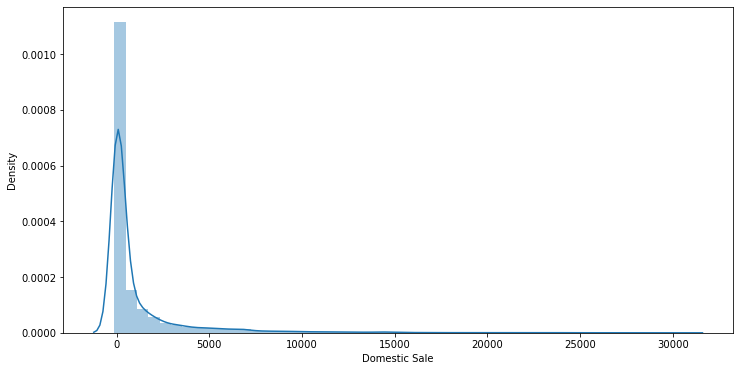

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(df['Domestic Sale'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


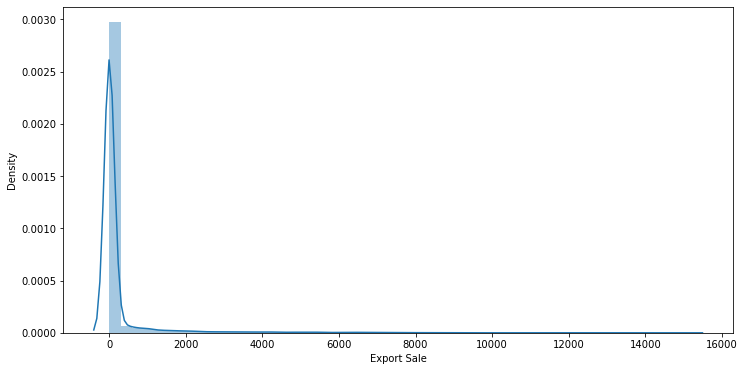

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(df['Export Sale'])
plt.show()

In [18]:
df['YrMth'] = pd.to_datetime(df['YrMth'], format = '%d-%m-%Y')

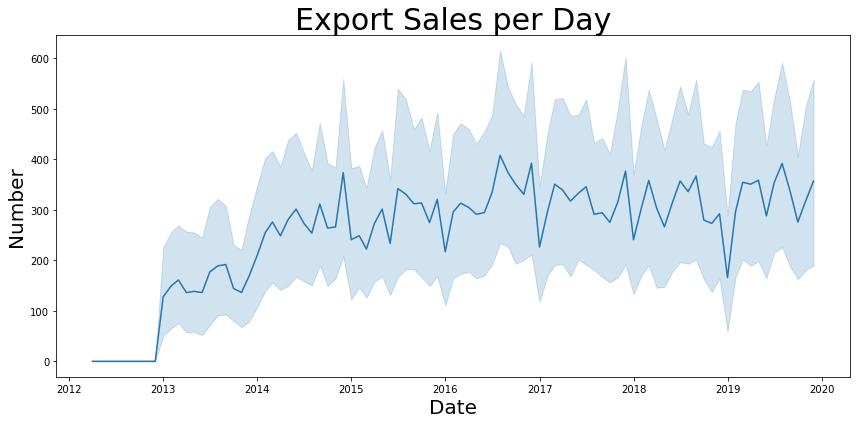

In [19]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="YrMth", y="Export Sale", data=df)
ax.set_title('Export Sales per Day', fontsize=30)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Number', fontsize=20)
plt.tight_layout()
plt.show()

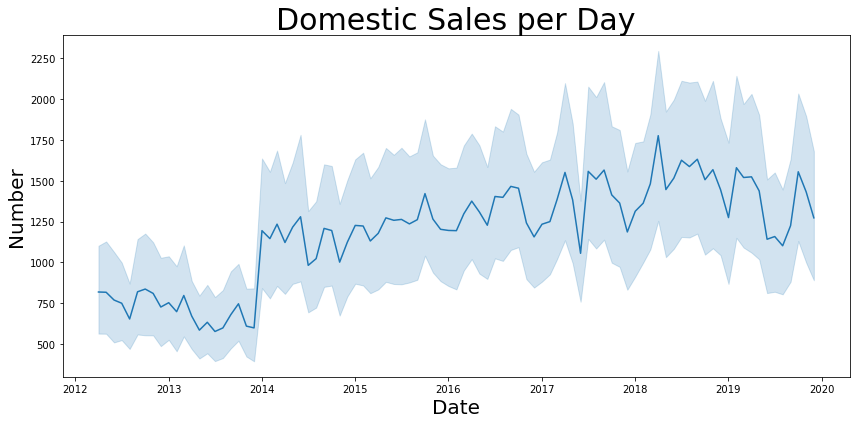

In [20]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="YrMth", y="Domestic Sale", data=df)
ax.set_title('Domestic Sales per Day', fontsize=30)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Number', fontsize=20)
plt.tight_layout()
plt.show()

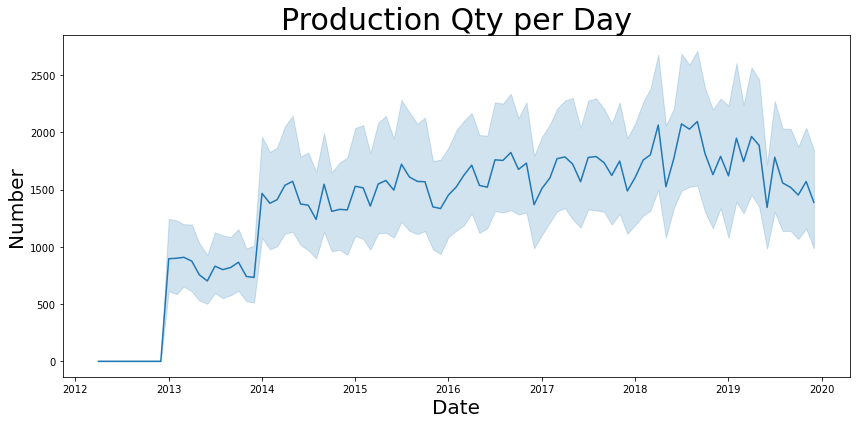

In [21]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="YrMth", y="Production Qty", data=df)
ax.set_title('Production Qty per Day', fontsize=30)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Number', fontsize=20)
plt.tight_layout()
plt.show()

In [22]:
df['Total Sale'] = df['Domestic Sale'] + df['Export Sale']

In [23]:
df.head(2)

,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,Domestic Sale,Export Sale,Category,Category Name,YrMth,Total Sale
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,2012-11-01,0
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,2012-11-01,0
